In [1]:
import pandas as pd
from pandas import Series,DataFrame
! pip install seaborn
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime, timedelta
import datetime

In [2]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('./data/train_users_2.csv')
test_df    = pd.read_csv('./data/test_users.csv')
airbnb_df['train_test'] = 'train'
test_df['train_test'] = 'test'
# preview the data
joined_df = pd.concat([airbnb_df, test_df], ignore_index = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [67]:
joined_df

,affiliate_channel,affiliate_provider,age,country_destination,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,Year,Month,age_range,timelag_nu
0,direct,direct,43,NDF,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255,train,2013,6,"(41, 51]",466.0
1,seo,google,38,NDF,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809,train,2013,6,"(31, 41]",732.0
2,direct,direct,56,US,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247,train,2010,8,"(51, 61]",476.0
3,direct,direct,42,other,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train,2012,9,"(41, 51]",765.0
4,direct,direct,41,US,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105,train,2010,2,"(31, 41]",280.0
5,other,other,37,US,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619,train,2010,1,"(31, 41]",0.0
6,other,craigslist,46,US,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558,train,2010,1,"(41, 51]",0.0
7,direct,direct,47,US,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905,train,2010,1,"(41, 51]",0.0
8,other,craigslist,50,US,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211,train,2010,7,"(41, 51]",0.0
9,other,craigslist,46,US,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758,train,2010,1,"(41, 51]",0.0


# 데이터 정제 및 탐색

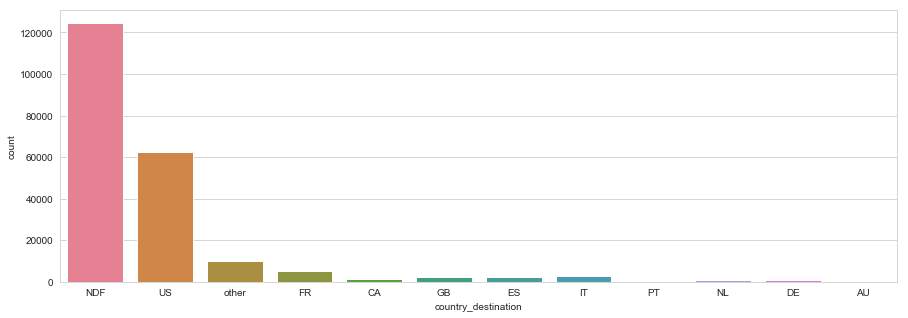

In [4]:
# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [62]:
# booked 예약된 건에서 날짜데이터를 가져와 분석해보기

def get_year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def get_month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

# Create Year and Month columns
joined_df['Year']  = joined_df['date_first_booking'].apply(get_year)
joined_df['Month'] = joined_df['date_first_booking'].apply(get_month)


# fill NaN
joined_df['Year'].fillna(joined_df['Year'].median(), inplace=True)
joined_df['Month'].fillna(joined_df['Month'].median(), inplace=True)


# convert type to integer
joined_df[['Year', 'Month']] = joined_df[['Year', 'Month']].astype(int)



In [6]:
joined_df

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,Year,Month
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255,train,2013,6
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809,train,2013,6
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247,train,2010,8
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train,2012,9
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105,train,2010,2
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619,train,2010,1
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558,train,2010,1
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905,train,2010,1
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211,train,2010,7
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758,train,2010,1


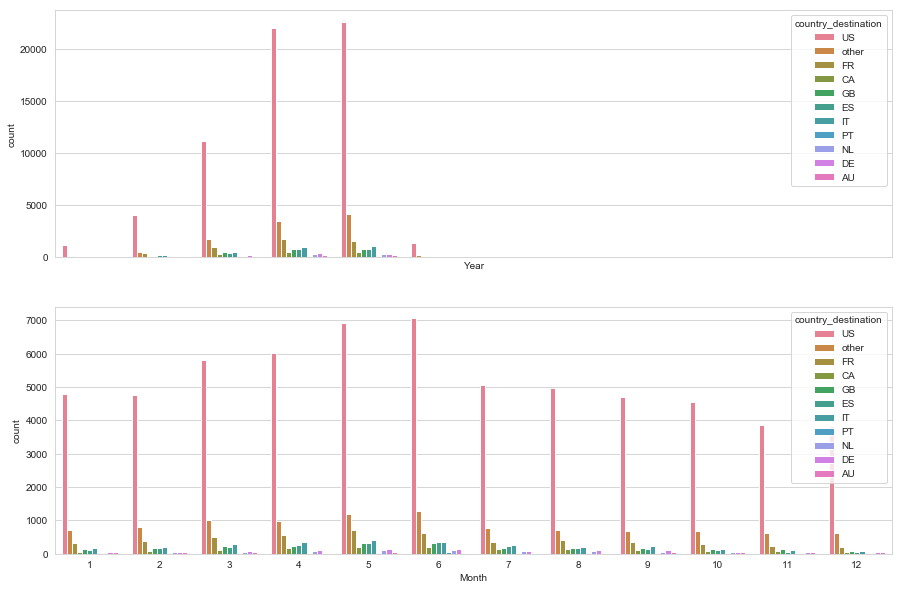

In [7]:
# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))

# frequency of country_destination for every year
sns.countplot(x="Year",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], order=[2010,2011,2012,2013,2014,2015], palette="husl", ax=axis1)
sns.countplot(x="Month",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], order=[1,2,3,4,5,6,7,8,9,10,11,12], palette="husl", ax=axis2)


# drop columns
#joined_df.drop(['date_first_booking','Month'], axis=1, inplace=True)

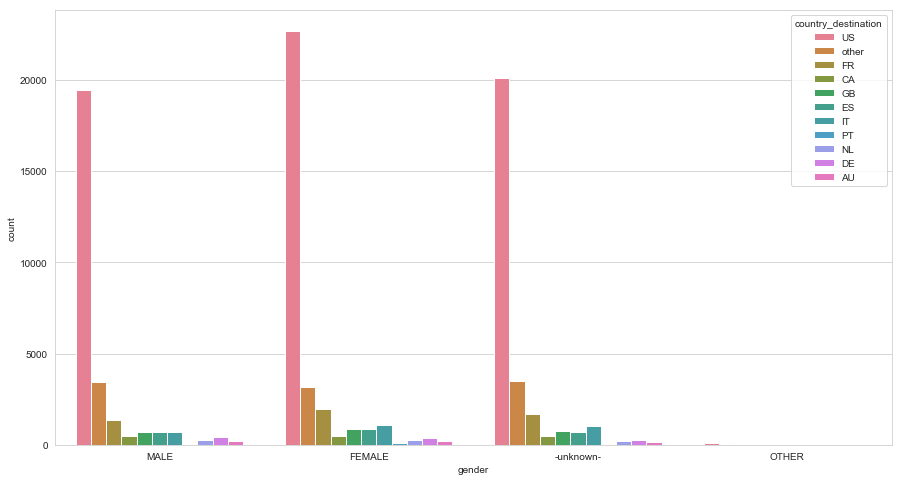

In [63]:
# booked 건 gender 분석

# Plot
fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], order=['MALE','FEMALE','-unknown-','OTHER'], palette="husl", ax=axis1)


In [65]:
# 14<age <95 를 벗어나는 값 Nan값 만들기.  14세 이하는 카드이용에 제한.

joined_df["age"][joined_df["age"] > 95] = np.NaN
joined_df["age"][joined_df["age"] < 14] = np.NaN


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


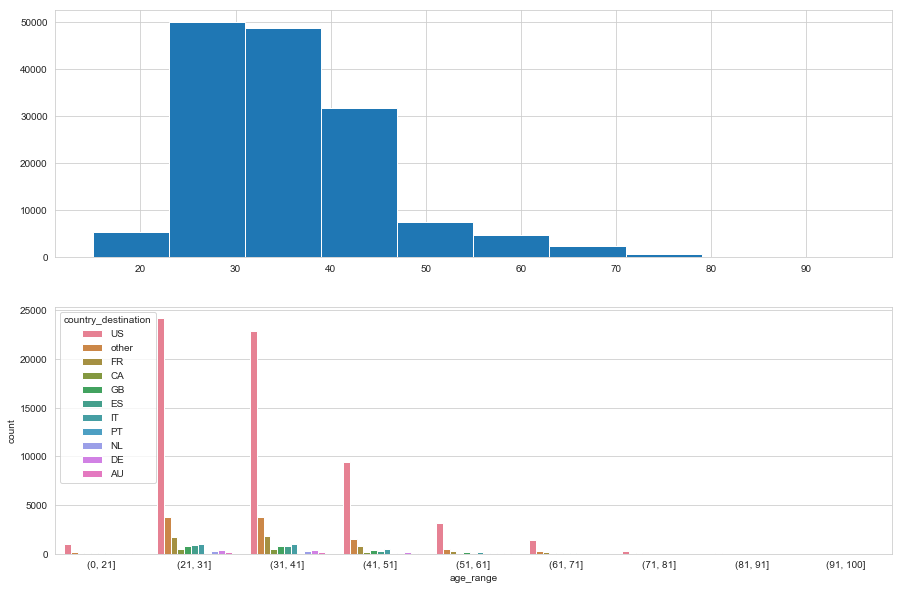

In [66]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
joined_df['age'][joined_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
joined_df['age_range'] = pd.cut(joined_df["age"], [0, 21, 31, 41, 51, 61, 71, 81, 91, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)


In [ ]:
# 평균, 표준편차, nan값 개수
average_age_airbnb   = joined_df["age"].mean()
std_age_airbnb       = joined_df["age"].std()
count_nan_age_airbnb = joined_df["age"].isnull().sum()


# 평균-표준편차, 평균+표준편차 사이의 랜덤 값 만들기
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)


# fill NaN values in Age column with random values generated
joined_df["age"][np.isnan(joined_df["age"])] = rand_1


# convert type to integer
joined_df['age'] = joined_df['age'].astype(int)



# 데이터가공 time_lag (첫 활동일 - 계정생성일)

In [12]:
joined_df['date_account_created_d'] = joined_df["date_account_created"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
airbnb_df['timestamp_first_active'][0]

20090319043255

In [14]:
x = list()
for i in range(len(joined_df['timestamp_first_active'])):
    x.append(str(joined_df["timestamp_first_active"][i])[:8])
joined_df["timestamp_first_active_temp"] = x

In [15]:
joined_df['timestamp_first_active_d'] = joined_df["timestamp_first_active_temp"].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

In [16]:
joined_df['timelag'] =  joined_df['date_account_created_d'] - joined_df['timestamp_first_active_d']

In [17]:
joined_df['timelag'][0]

Timedelta('466 days 00:00:00')

In [18]:
x = list()
for i in range(len(joined_df['timelag'])):
    x.append(float(str(joined_df['timelag'][i])[:-14]))
joined_df['timelag_nu'] = x

In [19]:
joined_df['first_affiliate_tracked'].isnull().sum()

6085

In [20]:
joined_df

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,timestamp_first_active,train_test,Year,Month,age_range,date_account_created_d,timestamp_first_active_temp,timestamp_first_active_d,timelag,timelag_nu
0,direct,direct,43,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,...,20090319043255,train,2013,6,"(41, 51]",2010-06-28,20090319,2009-03-19,466 days,466.0
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,...,20090523174809,train,2013,6,"(31, 41]",2011-05-25,20090523,2009-05-23,732 days,732.0
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,20090609231247,train,2010,8,"(51, 61]",2010-09-28,20090609,2009-06-09,476 days,476.0
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,20091031060129,train,2012,9,"(41, 51]",2011-12-05,20091031,2009-10-31,765 days,765.0
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,...,20091208061105,train,2010,2,"(31, 41]",2010-09-14,20091208,2009-12-08,280 days,280.0
5,other,other,37,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,...,20100101215619,train,2010,1,"(31, 41]",2010-01-01,20100101,2010-01-01,0 days,0.0
6,other,craigslist,46,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,...,20100102012558,train,2010,1,"(41, 51]",2010-01-02,20100102,2010-01-02,0 days,0.0
7,direct,direct,47,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,...,20100103191905,train,2010,1,"(41, 51]",2010-01-03,20100103,2010-01-03,0 days,0.0
8,other,craigslist,50,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,...,20100104004211,train,2010,7,"(41, 51]",2010-01-04,20100104,2010-01-04,0 days,0.0
9,other,craigslist,46,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,...,20100104023758,train,2010,1,"(41, 51]",2010-01-04,20100104,2010-01-04,0 days,0.0


In [21]:
joined_df["first_affiliate_tracked"].fillna('No', inplace = True)

In [36]:
joined_df.drop(['date_account_created','date_account_created_d', 'timestamp_first_active_temp', 'timestamp_first_active_d', 'timelag'], axis = 1, inplace = True)

KeyError: "['date_account_created' 'date_account_created_d'\n 'timestamp_first_active_temp' 'timestamp_first_active_d' 'timelag'] not found in axis"

In [37]:
joined_df.to_csv('./data/airbnb_data2.csv')

# 상관관계 분석

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm

In [49]:
cor_df    = pd.read_csv('./data/airbnb_data2.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
cor_df = DataFrame(cor_df)

In [51]:
type(cor_df)

pandas.core.frame.DataFrame

In [52]:
cor_df

,Unnamed: 0,affiliate_channel,affiliate_provider,age,country_destination,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,Year,Month,age_range,timelag_nu
0,0,direct,direct,43,NDF,NaN,untracked,Chrome,Mac Desktop,-unknown-,...,en,Web,0,facebook,20090319043255,train,2013,6,"(41, 51]",466.0
1,1,seo,google,38,NDF,NaN,untracked,Chrome,Mac Desktop,MALE,...,en,Web,0,facebook,20090523174809,train,2013,6,"(31, 41]",732.0
2,2,direct,direct,56,US,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,en,Web,3,basic,20090609231247,train,2010,8,"(51, 61]",476.0
3,3,direct,direct,42,other,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,en,Web,0,facebook,20091031060129,train,2012,9,"(41, 51]",765.0
4,4,direct,direct,41,US,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,...,en,Web,0,basic,20091208061105,train,2010,2,"(31, 41]",280.0
5,5,other,other,37,US,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,...,en,Web,0,basic,20100101215619,train,2010,1,"(31, 41]",0.0
6,6,other,craigslist,46,US,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,...,en,Web,0,basic,20100102012558,train,2010,1,"(41, 51]",0.0
7,7,direct,direct,47,US,2010-01-13,omg,Safari,Mac Desktop,FEMALE,...,en,Web,0,basic,20100103191905,train,2010,1,"(41, 51]",0.0
8,8,other,craigslist,50,US,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,...,en,Web,0,basic,20100104004211,train,2010,7,"(41, 51]",0.0
9,9,other,craigslist,46,US,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,...,en,Web,0,basic,20100104023758,train,2010,1,"(41, 51]",0.0


In [53]:
cor_df = cor_df.drop('Unnamed: 0', axis = 1)
cor_df = cor_df.drop('date_first_booking', axis = 1)
cor_df = cor_df.drop('Year', axis = 1)

In [54]:
cor_df.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'first_affiliate_tracked', 'first_browser', 'first_device_type',
       'gender', 'id', 'language', 'signup_app', 'signup_flow',
       'signup_method', 'timestamp_first_active', 'train_test', 'Month',
       'age_range', 'timelag_nu'],
      dtype='object')

In [55]:
corr = cor_df.corr()

In [56]:
print(corr)

                             age  signup_flow  timestamp_first_active  \
age                     1.000000    -0.075130               -0.077911   
signup_flow            -0.075130     1.000000                0.232152   
timestamp_first_active -0.077911     0.232152                1.000000   
Month                   0.003606    -0.003939               -0.172760   
timelag_nu              0.007846    -0.001345               -0.036497   

                           Month  timelag_nu  
age                     0.003606    0.007846  
signup_flow            -0.003939   -0.001345  
timestamp_first_active -0.172760   -0.036497  
Month                   1.000000   -0.000937  
timelag_nu             -0.000937    1.000000  


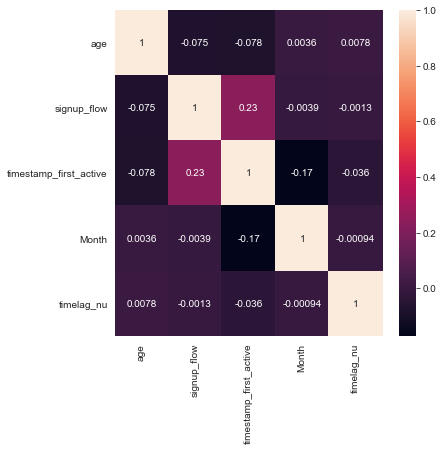

In [68]:
plt.figure(figsize=(6,6))
sns.heatmap(data = cor_df.corr(), annot = True)

In [60]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(cor_df['gender'])


LabelEncoder()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/su/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


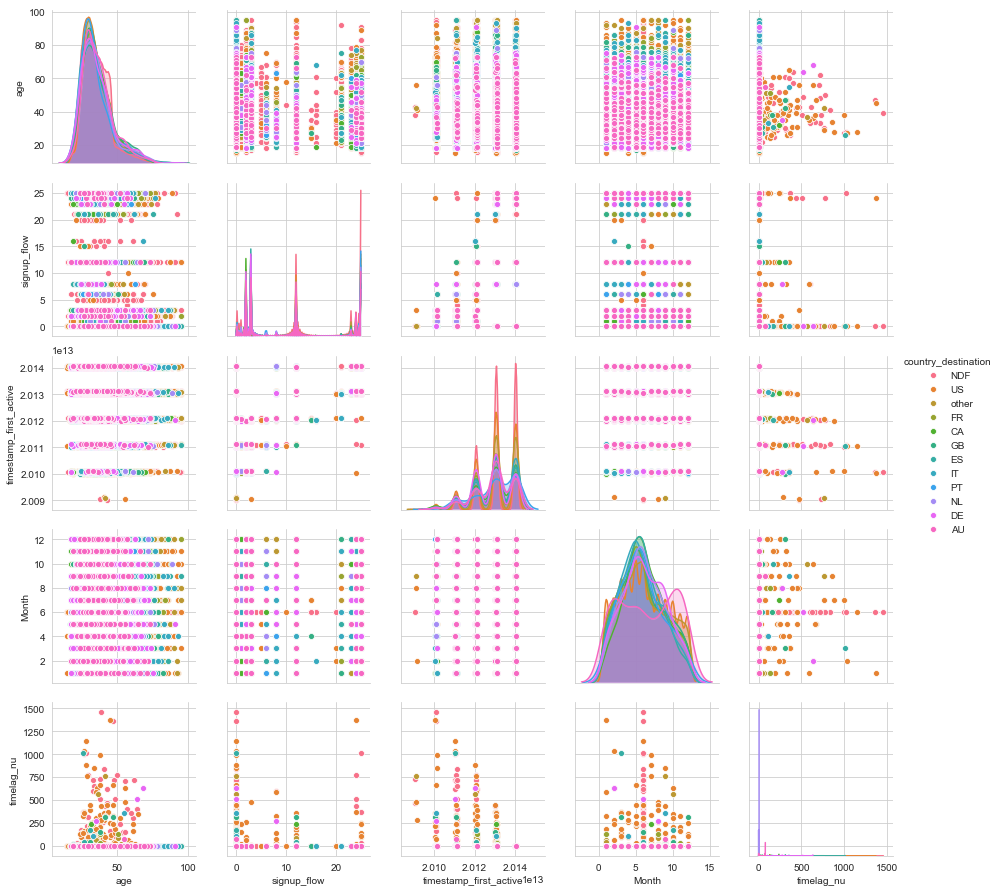

In [61]:
sns.pairplot(cor_df, hue = 'country_destination');
plt.show()